In [2]:
#! /usr/bin/env python3

#Imports
import sys
import os
import numpy as np
from ast import literal_eval
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.manifold import TSNE
from collections import Counter

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
#import tables
import time
from scipy import stats
import glob
import pdb

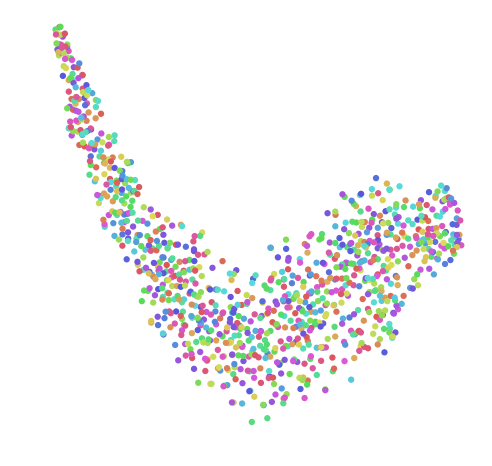

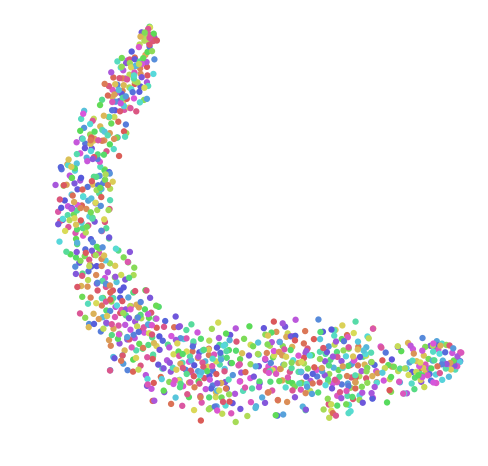

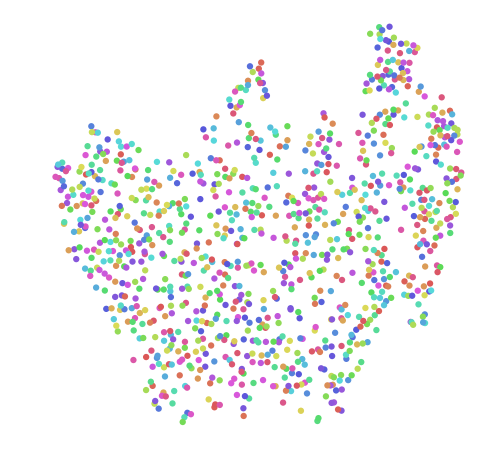

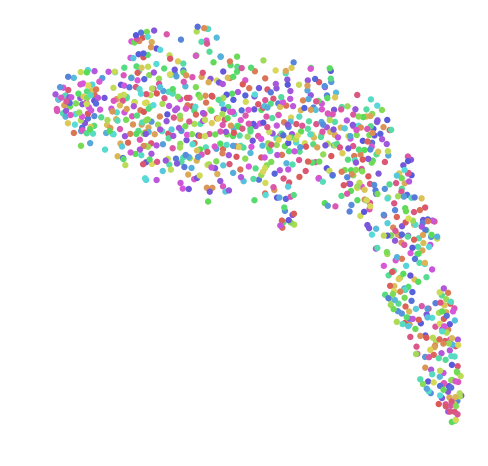

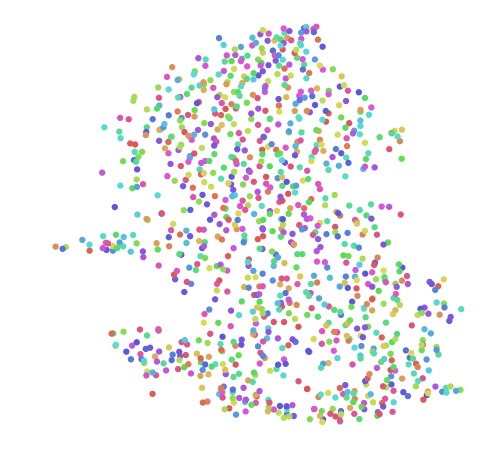

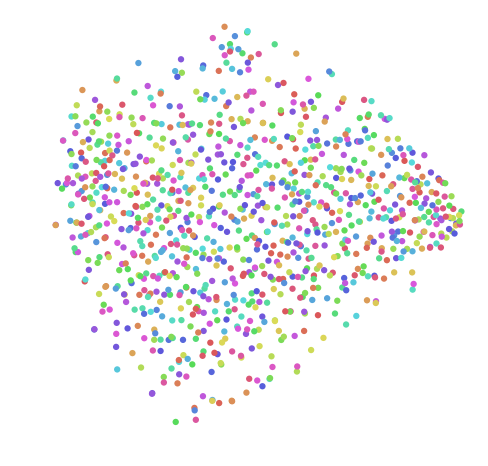

In [ ]:
y_labels = np.load('/home/pbryant/results/CATH/model_out/20190801/y_valid.npy', allow_pickle=True)
base = '/home/pbryant/results/CATH/model_out/20190801/'

y_labels = y_labels[0:1000]
#Convert labels to start from 0
u_labels = np.unique(y_labels)
convert_labels = {}
for i in range(0,len(u_labels)):
    convert_labels[u_labels[i]] = i
new_labels = []
for i in range(0, len(y_labels)):
    new_labels.append(convert_labels[y_labels[i]])

for emb in glob.glob(base+'*emb*'):
    embeddings = np.load(emb, allow_pickle=True)
    embeddings = embeddings[0:1000]
    fashion_tsne = TSNE(random_state=0).fit_transform(embeddings)
    fashion_scatter(fashion_tsne, np.asarray(new_labels))
    plt.show()


In [17]:
# Utility function to visualize the outputs of PCA and t-SNE

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    return f, ax, sc